In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# __Advertising__

Una empresa que fabrica electrodomésticos desea mejorar sus ganancias en el próximo año. Actualmente, la empresa invierte en medios publicitarios como televisión, radio y periódicos. La empresa registra el dinero invertido en cada medio publicitario (en miles de dólares) y la cantidad de unidades de producto vendidas (en miles de unidades). Usted es contratado como consultor y tiene la misión de construir un modelo predictivo que le ayude a la empresa a determinar la forma más eficaz de invertir el dinero en publicidad de tal manera que se logre un incrementó en las ventas

## __Preparación de los datos__

Cargue los datos en un `DataFrame` y asigne los nombres a las columnas (si es necesario).

In [ ]:
durl_file_path = 'https://raw.githubusercontent.com/jpospinalo/MachineLearning/main/Linear%20Regression/advertising2.csv'
data = pd.read_csv(durl_file_path)

Genere un resumen de los datos a través del método `info()` y verifique si el tipo de datos de cada columna es correcto.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      208 non-null    object 
dtypes: float64(3), object(1)
memory usage: 6.6+ KB


In [ ]:
data.Sales = data.Sales.map(lambda x: float(x.replace(',','.')))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      208 non-null    float64
dtypes: float64(4)
memory usage: 6.6 KB


Genere un conjunto de datos de prueba con el 20% de los datos disponibles. Recuerde no realizar ningún cambio antes de dividir los datos. **Todos los pasos posteriores se realizarán únicamente sobre el conjunto de datos de entrenamiento. Los datos de prueba no deben manipularse en ninguna circunstancia.**

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=3, shuffle=True)

Verifique si existen valores faltantes. En caso de existir encontrar consulte como remplazarlos por la media utilizando la clase `SimpleImputer()` disponible en Sklearn.

In [ ]:
train.isnull().sum()

TV           7
Radio        7
Newspaper    7
Sales        0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

simple_imputer = SimpleImputer(strategy="mean")

Consulte como realizar el proceso de escalado de los datos utilizando la clase `StandarScaler()` disponible en Sklearn

In [ ]:
from sklearn.preprocessing import StandardScaler

standar_scaler = StandardScaler()

Construya un pipeline que incluya los pasos de imputación de valores faltantes y el proceso de escalado


In [ ]:
from sklearn.pipeline import Pipeline

preprocessor = Pipeline(
    steps=[("numerical_imputer", simple_imputer),
           ("scaler", standar_scaler)])

Realice las transformaciones sobre los datos de entrenamiento utilizando el pipeline. Usualmente se acostumbra no realizar cambios sobre la variable a predecir.

In [ ]:
transformed_train = preprocessor.fit_transform(train[['TV', 'Radio', 'Newspaper']])
transformed_train = pd.DataFrame(transformed_train, columns=['TV', 'Radio', 'Newspaper'], index=train.index)
transformed_train['Sales'] = train['Sales']
transformed_train.head()

,TV,Radio,Newspaper,Sales
134,-0.076345,-0.619784,-0.960489,13.4
41,-1.066853,-1.471665,-0.446195,8.1
151,0.682121,1.465621,-0.528849,22.6
161,0.901464,-1.444405,-0.712526,16.6
15,-1.585196,-1.464850,-1.382945,4.8


In [ ]:
transformed_train.shape

(166, 4)

In [ ]:
train.isnull().sum()

TV           7
Radio        7
Newspaper    7
Sales        0
dtype: int64

## __Análisis exploratorio__
Genere un resumen estadístico utilizando el método `describe()`

In [ ]:
transformed_train.describe()

,TV,Radio,Newspaper,Sales
count,1.660000e+02,1.660000e+02,1.660000e+02,166.000000
mean,-2.782246e-16,-2.514722e-16,1.391123e-16,15.112732
std,1.003026e+00,1.003026e+00,1.003026e+00,5.440482
min,-1.676397e+00,-1.607966e+00,-1.415088e+00,1.600000
25%,-8.697331e-01,-8.821630e-01,-7.768125e-01,11.000000
50%,-3.281111e-16,0.000000e+00,-1.775683e-01,15.550000
75%,8.356608e-01,8.812308e-01,6.420876e-01,19.350000
max,1.737277e+00,1.772298e+00,3.805913e+00,27.000000


Genere el histograma de frecuencias para todas las características disponibles

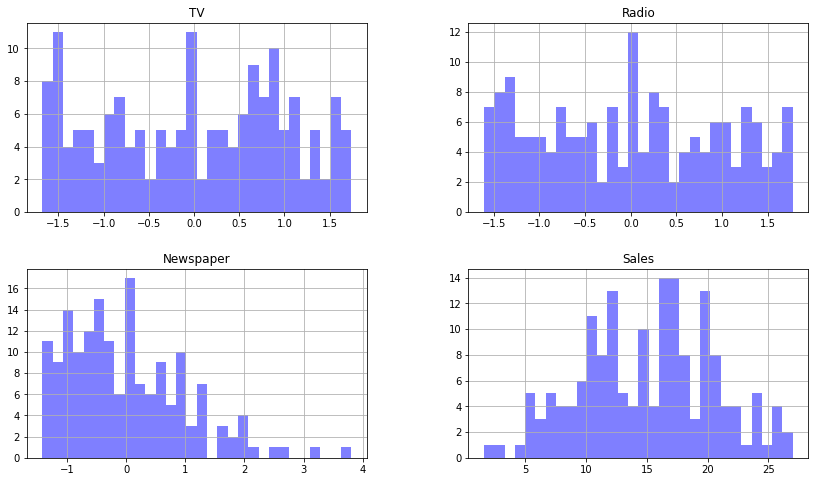

In [ ]:
transformed_train.hist(bins=30, figsize=(14,8), color="blue", alpha=0.5)
plt.show()

Identifique posibles valores atípicos en los datos. Elimine los valores utilizando el método IQR (si lo considera necesario)

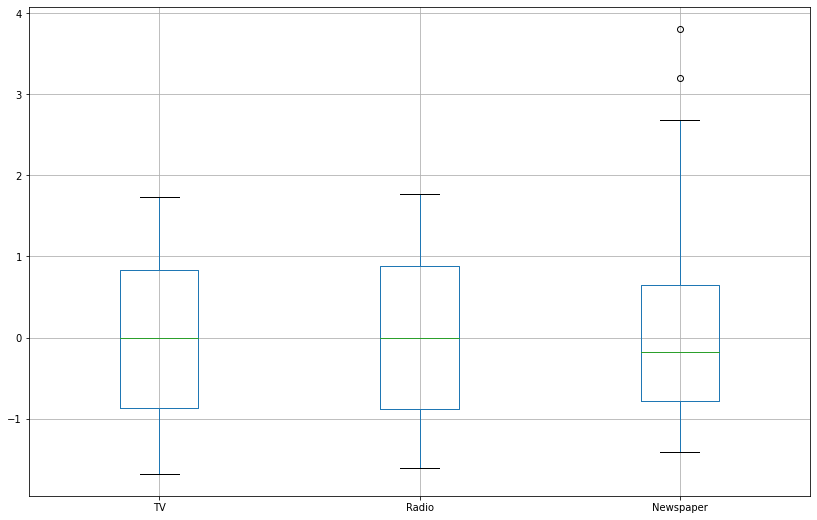

In [ ]:
transformed_train[['TV', 'Radio', 'Newspaper']].boxplot(figsize=(14,9))
plt.show()

In [ ]:
Q1 = transformed_train.quantile(0.25)
Q3 = transformed_train.quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR


Eliminando las filas que contiene valores atípicos.

In [ ]:
#transformed_train = transformed_train[~((transformed_train < lower_limit) |(transformed_train > upper_limit)).any(axis=1)]
transformed_train.shape

(166, 4)

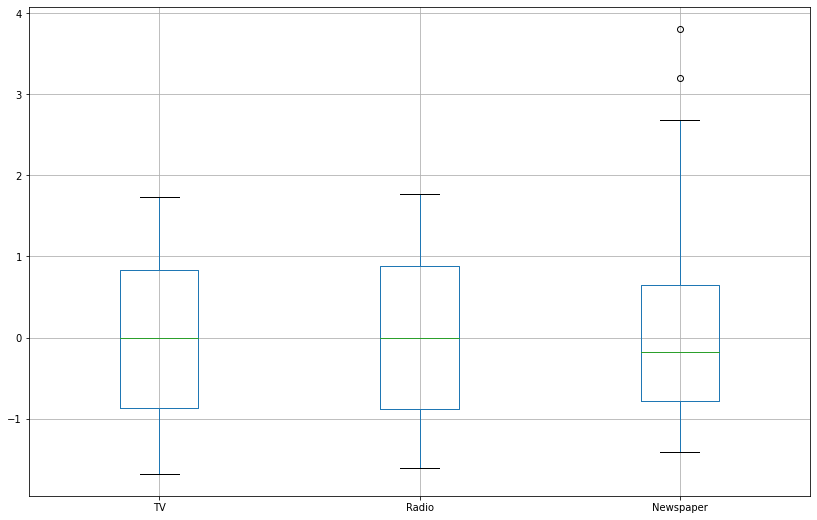

In [ ]:
transformed_train[['TV', 'Radio', 'Newspaper']].boxplot(figsize=(14,9))
plt.show()

Genere una matriz de dispersión e identifique visualmente si existe correlación entre variables.

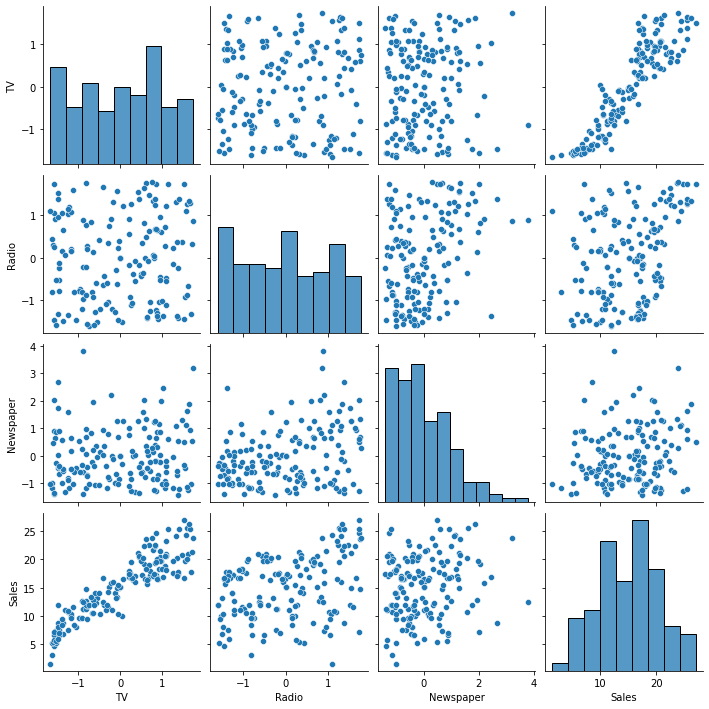

In [ ]:
from seaborn.distributions import kdeplot
import seaborn as sns
sns.pairplot(transformed_train)

Genere la matriz de correlación para todas las características y preséntela a través de un mapa de calor.

In [ ]:
transformed_train.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.053499,0.075940,0.909078
Radio,0.053499,1.000000,0.334141,0.340848
Newspaper,0.075940,0.334141,1.000000,0.168985
Sales,0.909078,0.340848,0.168985,1.000000


In [ ]:
transformed_train.corr()['Sales'].sort_values(ascending=False)

Sales        1.000000
TV           0.909078
Radio        0.340848
Newspaper    0.168985
Name: Sales, dtype: float64

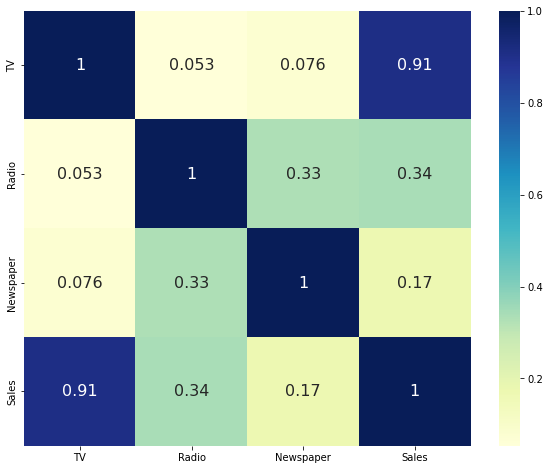

In [ ]:
plt.figure(figsize=(10, 8))
plt.rc({'size': '18'})
sns.heatmap(transformed_train.corr(), annot=True, cmap="YlGnBu", annot_kws={"size":16})

Considerando los valores de correlación determine cuales variables podrían tener una mayor influencia sobre el modelo.

*` La inversión en TV tiene la correlación más alta en comparación con las demás características`

## __Generar el modelo__

Construya un modelo para cada uno de los medios publicitarios disponibles (un modelo por cada característica). Utilice el pipeline de preprocesamiento generado en el paso anterior y genere un nuevo pipeline agregando el estimador correspondiente. Para este caso utilizaremos la clase `SGDRegressor`, sin embargo, el procedimiento e

In [ ]:
from sklearn.linear_model import SGDRegressor

model_result = {}
X_train, y_train = train.drop('Sales', axis='columns'), train['Sales']

In [ ]:
for feature in X_train.columns:

  regressorSGD = Pipeline(
      steps=[("numerical_imputer", SimpleImputer(strategy='mean')),
           ("scaler", StandardScaler()),
           ("sgd", SGDRegressor())])

  regressorSGD.fit(X_train[feature].values.reshape(-1,1), y_train)

  model_result[feature] = regressorSGD

En cada caso genere un gráfico con los datos de entrenamiento y la línea de regresión

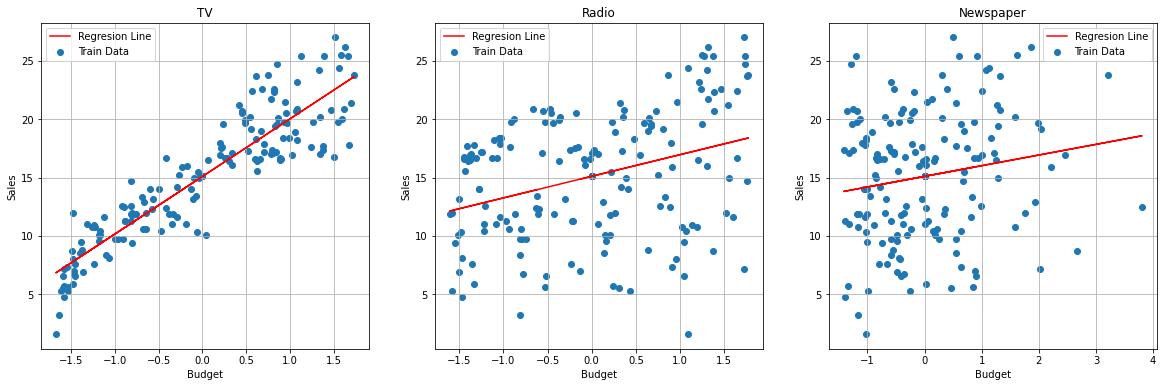

In [ ]:
fig, axes = plt.subplots(1, len(X_train.columns), figsize=(20, 6))

for i in range(3):
  X_values = X_train.iloc[:,i].values.reshape(-1, 1)
  y_values = y_train.values.reshape(-1, 1)

  axes[i].scatter(transformed_train.iloc[:,i], y_values, label='Train Data')
  model = model_result[X_train.columns[i]]
  predicted = model.predict(X_values)

  axes[i].plot(transformed_train.iloc[:,i], predicted, color='red', label='Regresion Line')
  axes[i].set_title(X_train.columns[i])
  axes[i].set_xlabel('Budget')
  axes[i].set_ylabel('Sales')
  axes[i].grid()
  axes[i].legend()

Para los tres casos, genere los diagramas de residuos, el histograma del error y la gráfica de cuantiles. Verifique si existe una relación lineal entre las características y la variable objetivo.

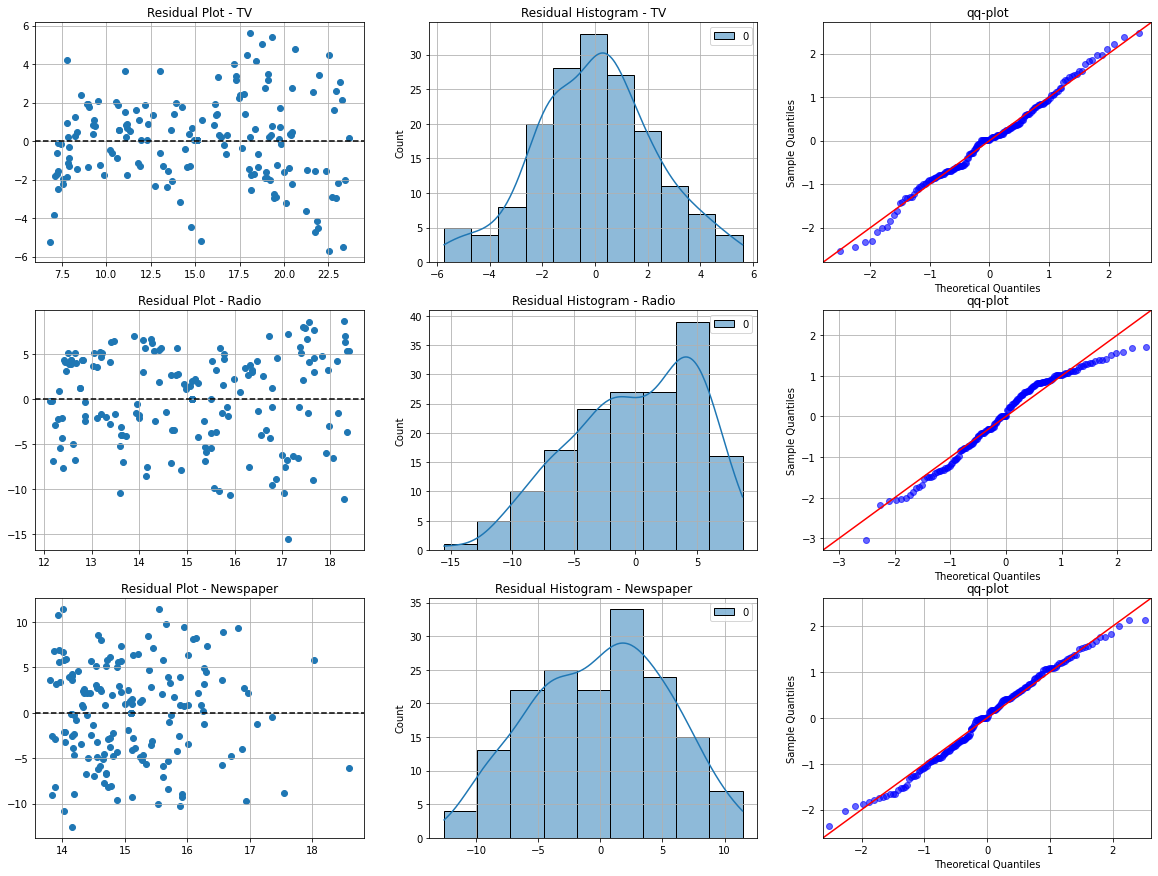

In [ ]:
from statsmodels.api import qqplot

selected = ['TV','Radio','Newspaper']
residuals_train = {}
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

for i, feature in enumerate(selected):

  X_values = X_train[feature].values.reshape(-1,1)
  y_values = y_train.values.reshape(-1, 1)
  model = model_result[feature]
  y_pred = model.predict(X_values)
  residual =  y_values - y_pred.reshape(-1,1)
  residuals_train[feature] = residual
  axes[i][0].axhline(y=0, color='black', linestyle='--')
  axes[i][0].scatter(y_pred, residual)
  axes[i][0].set_title('Residual Plot - ' +  feature)
  sns.histplot(residual, kde=True, ax=axes[i][1])
  axes[i][1].set_title('Residual Histogram - ' +  feature)
  qqplot(np.sort(residual.flatten()), fit=True, line="45", ax=axes[i][2], alpha= 0.6)
  axes[i][2].set_title('qq-plot')
  axes[i][0].grid()
  axes[i][1].grid()
  axes[i][2].grid()

Compare los coeficientes de determinación $R^2$ obtenidos mediante un diagrama de barras

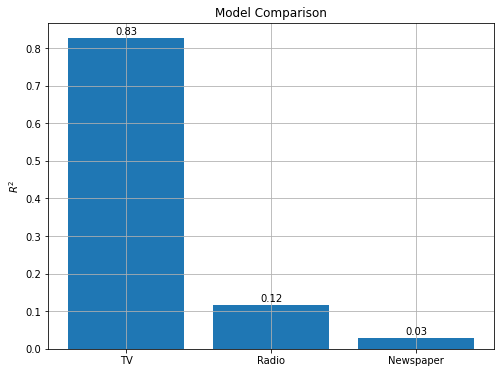

In [ ]:
scores = []
for i, feature in enumerate(X_train.columns):
  X_values = X_train.iloc[:,i].values.reshape(-1, 1)
  y_values = y_train.values.reshape(-1, 1)
  model = model_result[feature]
  scores.append(model.score(X_values, y_values))

plt.figure(figsize=(8,6))
plt.bar(X_train.columns, scores)
plt.ylabel('$R^2$')
plt.title('Model Comparison')
plt.grid()

def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i] + 0.01, round(y[i],2), ha = 'center')

add_labels(X_train.columns, scores)

Construya un modelo para todas las posibles combinaciones de características. En este caso, puede utilizar el módulo `itertools` para generar todas las posibles combinaciones. Utilice el pipeline de preprocesamiento generado en el paso anterior y agregue el estimador correspondiente.

In [ ]:
from itertools import combinations

all_combinatios = []
model_final = {}
features = ['TV', 'Radio', 'Newspaper']
final_scores = []
for i in range(1, 4):
  all_combinatios += list(combinations(features, i))

all_combinatios = [list(combination) for combination in all_combinatios]
all_combinatios

[['TV'],
 ['Radio'],
 ['Newspaper'],
 ['TV', 'Radio'],
 ['TV', 'Newspaper'],
 ['Radio', 'Newspaper'],
 ['TV', 'Radio', 'Newspaper']]

In [ ]:
for combination in all_combinatios:
   sgd = SGDRegressor()
   X_values = X_train[combination].values.reshape(-1, len(combination))
   y_values = y_train.ravel()

   regressorSGD = Pipeline(
      steps=[("numerical_imputer", SimpleImputer(strategy='mean')),
           ("scaler", StandardScaler()),
           ("sgd", SGDRegressor())])

   regressorSGD.fit(X_values, y_values)
   y_pred = regressorSGD.predict(X_values)
   model_final[combination.__repr__()] = regressorSGD
   final_scores.append(regressorSGD.score(X_values, y_values))

Compare los coeficientes de correlación obtenidos en todos los modelos mediante un diagrama de barras

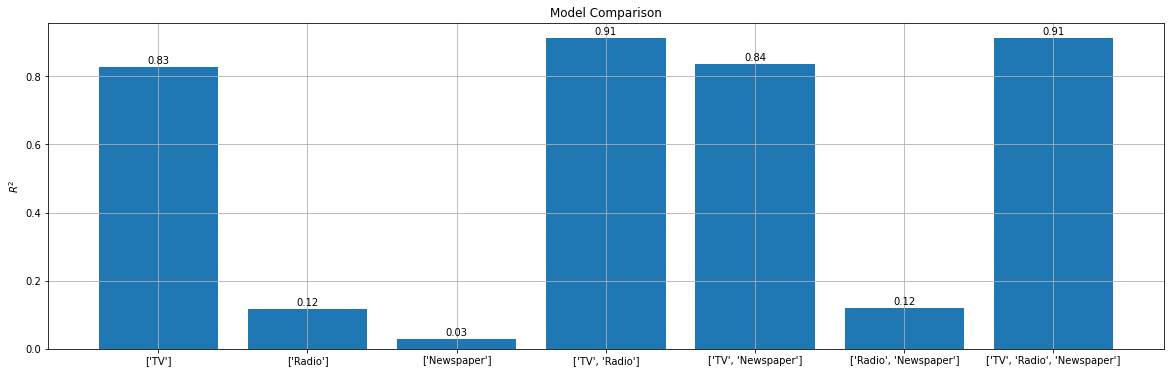

In [ ]:
plt.figure(figsize=(20,6))
plt.bar(model_final.keys(), final_scores)
plt.ylabel('$R^2$')
plt.title('Model Comparison')
plt.grid()

def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i] + 0.01, round(y[i],2), ha = 'center')

add_labels(model_final.keys(), final_scores)

## __Evaluación de desempeño__

Evalúe cada modelo con los datos de prueba. Recuerde utilizar el  pipeline de preprocesamiento .

In [ ]:
test_scores = []

X_test, y_test = test.drop('Sales', axis='columns'), test['Sales']

for combination in all_combinatios:

  X_values = X_test[combination].values.reshape(-1,len(combination))
  y_values = y_test.values.reshape(-1, 1)

  model = model_final[combination.__repr__()]
  test_scores.append(model.score(X_values, y_values))


Compare los coeficientes de determinación de los datos de prueba con lo obtenidos en los datos de entrenamiento a través de un gráfico de barras

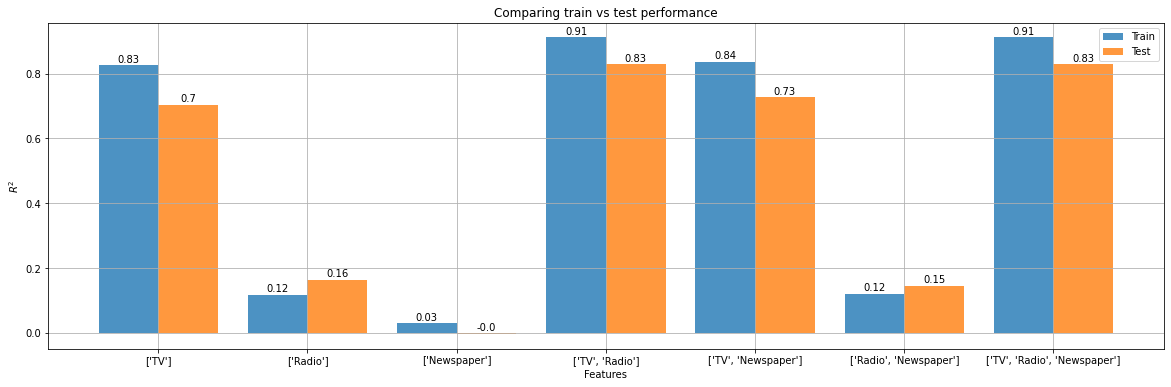

In [ ]:
plt.figure(figsize=(20,6))

X_axis = np.arange(len(model_final.keys()))

plt.bar(X_axis - 0.2, final_scores, 0.4, label = 'Train', alpha=0.8)
plt.bar(X_axis + 0.2,test_scores, 0.4, label = 'Test', alpha=0.8)

plt.ylabel('$R^2$')
plt.title('Test Comparison')
plt.grid()
plt.xticks(X_axis, model_final.keys())
plt.xlabel("Features")
plt.title("Comparing train vs test performance")
plt.legend()

def addlabels(x, y, val):
    for i in range(len(x)):
        plt.text(i + val , y[i] + 0.01, round(y[i],2), ha = 'center')

addlabels(model_final.keys(), final_scores, - 0.2)
addlabels(model_final.keys(), test_scores, + 0.2)
plt.show()

Realice el análisis de residuos para el conjunto de prueba. Compare los resultados obtenidos con los datos de entrenamiento

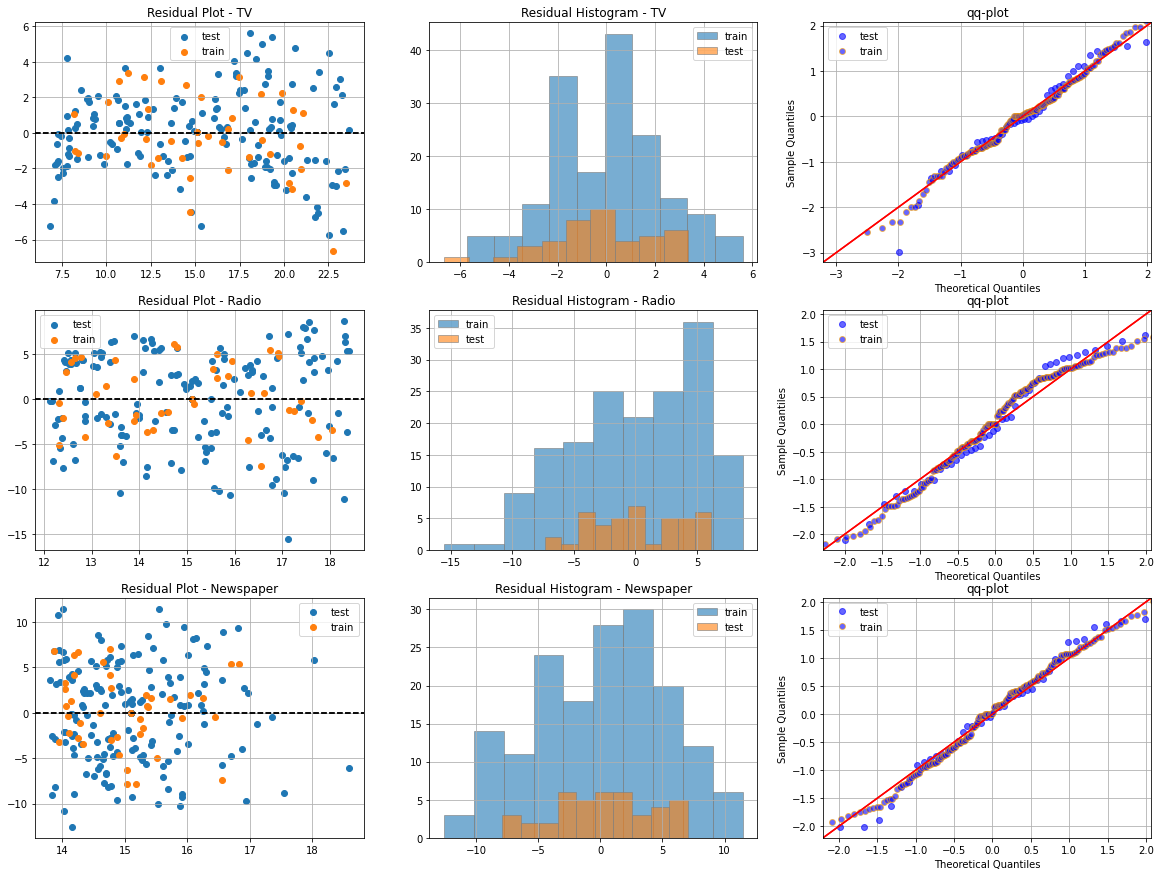

In [ ]:
selected = ['TV','Radio','Newspaper']
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

for i, combination in enumerate(selected):

  X_train_values = X_train[combination].values.reshape(-1,1)
  residual_ = residuals_train[combination]

  X_test_values = X_test[combination].values.reshape(-1,1)
  y_values = y_test.values.reshape(-1, 1)
  model = model_result[combination]
  y_pred = model.predict(X_test_values)
  y_pred_ = model.predict(X_train_values)
  residual = y_values - y_pred.reshape(-1,1)
  axes[i][0].axhline(y=0, color='black', linestyle='--')
  axes[i][0].scatter(y_pred_, residual_, label='test')
  axes[i][0].set_title('Residual Plot - ' +  feature)

  axes[i][0].axhline(y=0, color='black', linestyle='--')
  axes[i][0].scatter(y_pred, residual, label='train')
  axes[i][0].set_title('Residual Plot - ' +  combination)
  axes[i][0].legend()
  axes[i][0].grid()

  axes[i][1].hist(residual_, alpha= 0.6, ec="grey", label='train')
  axes[i][1].hist(residual, alpha= 0.6, ec="grey", label='test')
  axes[i][1].set_title('Residual Histogram - ' +  combination)
  axes[i][1].legend()
  axes[i][1].grid()

  qqplot(np.sort(residual.flatten()), fit=True, line="45", ax=axes[i][2], alpha= 0.6, label='test')
  axes[i][2].set_title('qq-plot')
  qqplot(np.sort(residual_.flatten()), fit=True, line="45", ax=axes[i][2], alpha= 0.6, color='orange', label='train')
  axes[i][2].set_title('qq-plot')
  axes[i][2].grid()
  axes[i][2].legend()

## __Seleccione del modelo__

* Seleccione el modelo que a su modo de ver ofrece una mejor solución. Explique su respuesta.
* ¿Considera que los datos proporcionados por la empresa son suficientes? ¿Son los adecuados? Presente algunas sugerencias para mejorar el estado actual del modelo.
* En un párrafo, escriba su recomendación para la empresa.

In [ ]:
train


,TV,Radio,Newspaper,Sales
134,139.3,14.5,10.2,13.4
41,53.5,2.0,21.4,8.1
151,205.0,45.1,19.6,22.6
161,224.0,2.4,15.6,16.6
15,8.6,2.1,1.0,4.8
...,...,...,...,...
200,120.5,28.5,14.2,14.2
184,193.2,18.4,65.7,20.2
131,240.1,7.3,8.7,18.2
152,287.6,43.0,71.8,26.2


In [ ]:
transformed_train.isnull().sum()


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64